<a href="https://colab.research.google.com/github/Shinhunjun/Data-Analysis_Study/blob/main/23_1_11(sklearn_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 (regression) 예측

수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

**예시**
- 주택 가격 예측
- 매출액 예측

[도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [2]:
from sklearn.datasets import load_boston

데이터 로드

In [3]:
data = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

data['data']에는 X 데이터, data['feature_names']에는 컬럼 명입니다.

In [5]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Y 데이터인 price도 데이터프레임에 추가 합니다.

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

train / test 데이터를 분할 합니다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

<ipython-input-9-5fdc4024a942>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])


In [10]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [11]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58
408,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40
296,0.05372,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39


In [12]:
y_train.head()

150    21.5
152    15.3
124    18.8
408    17.2
296    27.1
Name: MEDV, dtype: float64

## 평가 지표 만들기

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 뒤 **루트**를 씌운 값

### 평가 지표 만들어 보기

In [14]:
import numpy as np

In [15]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [16]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [17]:
my_mse(pred, actual)

4.0

In [18]:
def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

In [19]:
my_mae(pred, actual)

2.0

In [20]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [21]:
my_rmse(pred, actual)

2.0

### sklearn의 평가지표 활용하기

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [24]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(n_jobs=-1)

* n_jobs: CPU코어의 사용

In [28]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
pred = model.predict(x_test)

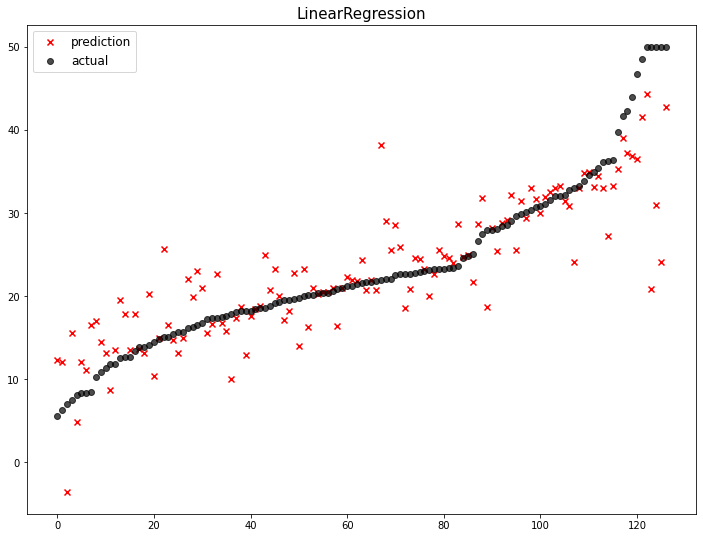

              model        mse
0  LinearRegression  32.575487


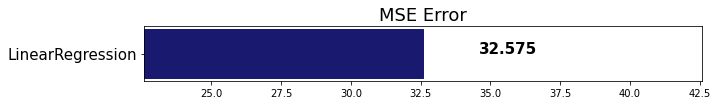

In [30]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)

학습이 과대적합 되는 것을 방지하고자 일종의 **penalty**를 부여하는 것

**L2 규제 (L2 Regularization)**

* 각 가중치 제곱의 합에 규제 강도(Regularization Strength) λ를 곱한다. 
* λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가한다(규제를 중요시하지 않음).

**L1 규제 (L1 Regularization)**

* 가중치의 제곱의 합이 아닌 **가중치의 합**을 더한 값에 규제 강도(Regularization Strength) λ를 곱하여 오차에 더한다. 
* 어떤 가중치(w)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것이다. 


**L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다**

**릿지(Ridge) - L2 규제**

$Error=MSE+αw^2$ 

**라쏘(Lasso) - L1 규제**  

$Error=MSE+α|w|$

In [31]:
from sklearn.linear_model import Ridge

In [32]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

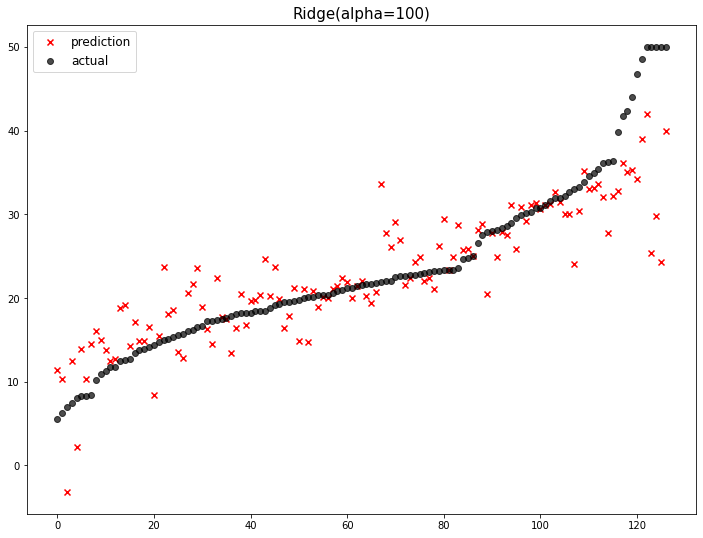

              model        mse
0  LinearRegression  32.575487
1  Ridge(alpha=100)  30.454130


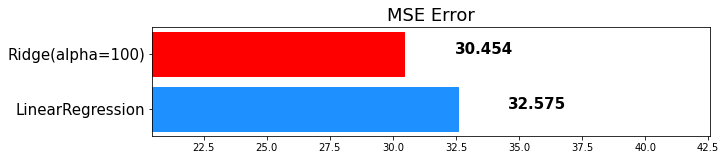

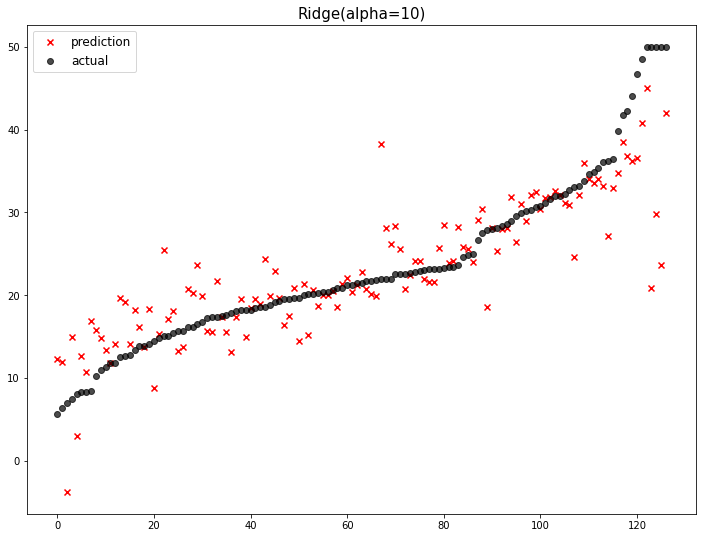

              model        mse
0  LinearRegression  32.575487
1   Ridge(alpha=10)  32.441541
2  Ridge(alpha=100)  30.454130


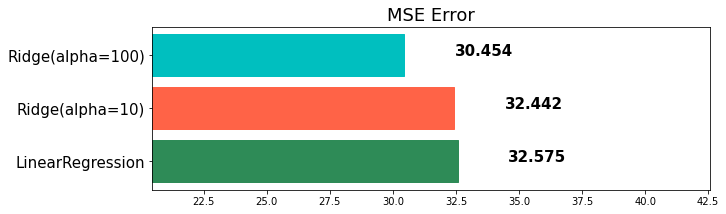

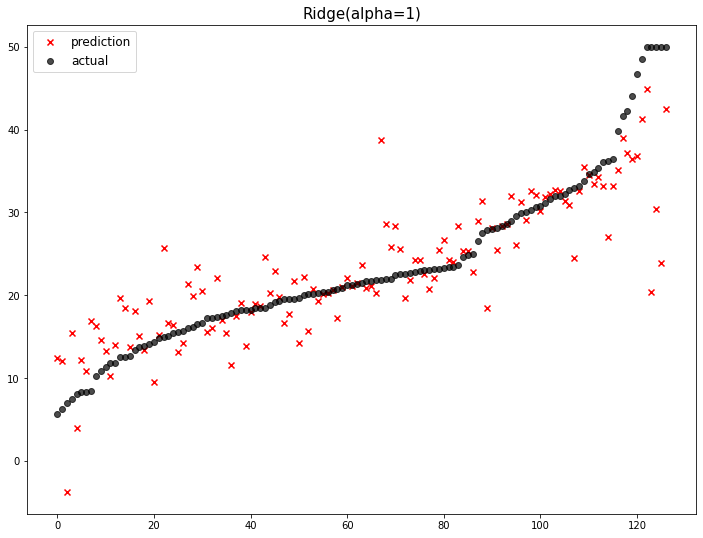

              model        mse
0  LinearRegression  32.575487
1    Ridge(alpha=1)  32.556222
2   Ridge(alpha=10)  32.441541
3  Ridge(alpha=100)  30.454130


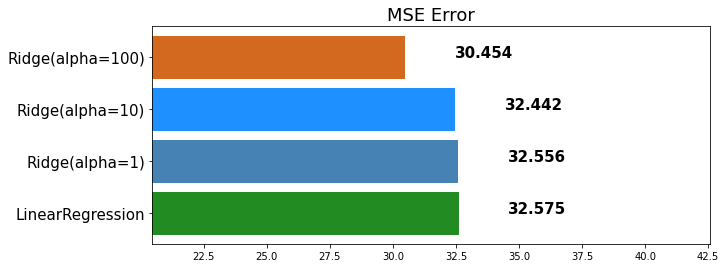

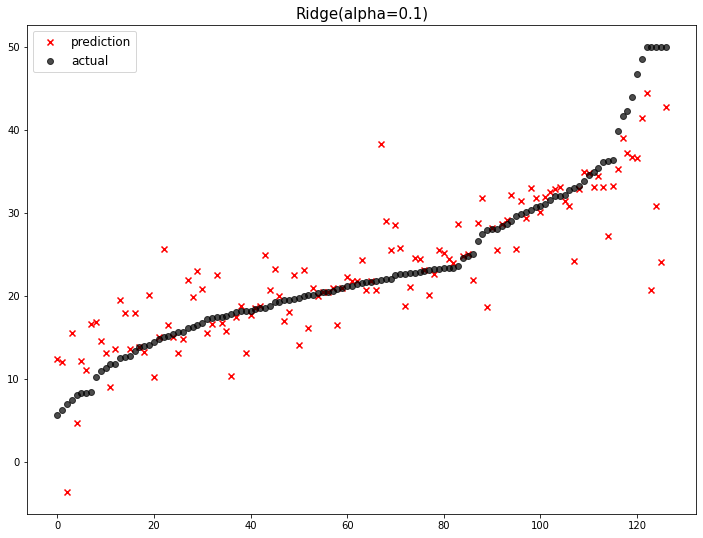

              model        mse
0  LinearRegression  32.575487
1    Ridge(alpha=1)  32.556222
2  Ridge(alpha=0.1)  32.533482
3   Ridge(alpha=10)  32.441541
4  Ridge(alpha=100)  30.454130


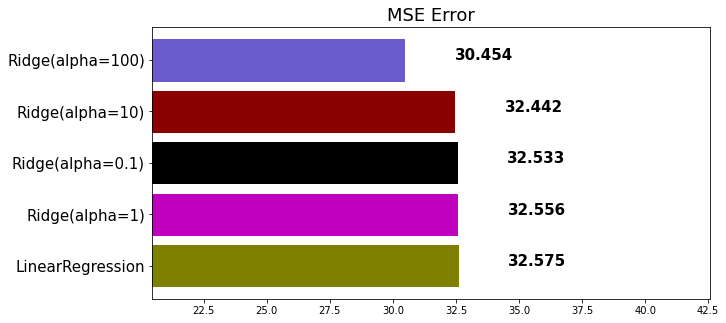

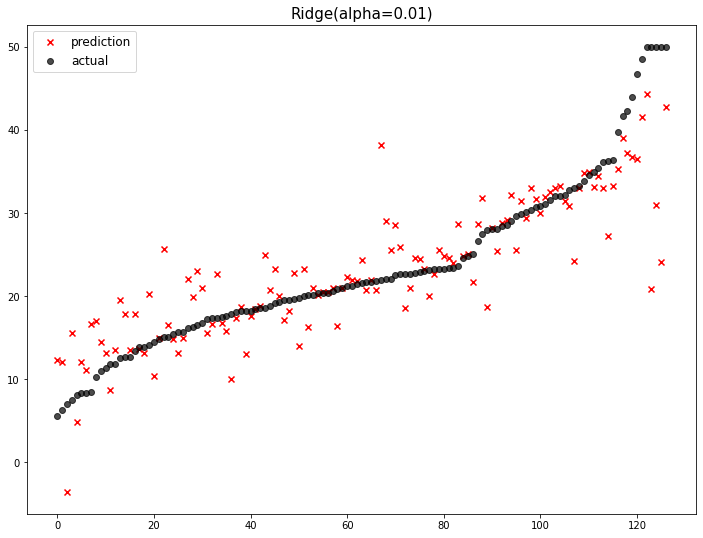

               model        mse
0   LinearRegression  32.575487
1  Ridge(alpha=0.01)  32.570078
2     Ridge(alpha=1)  32.556222
3   Ridge(alpha=0.1)  32.533482
4    Ridge(alpha=10)  32.441541
5   Ridge(alpha=100)  30.454130


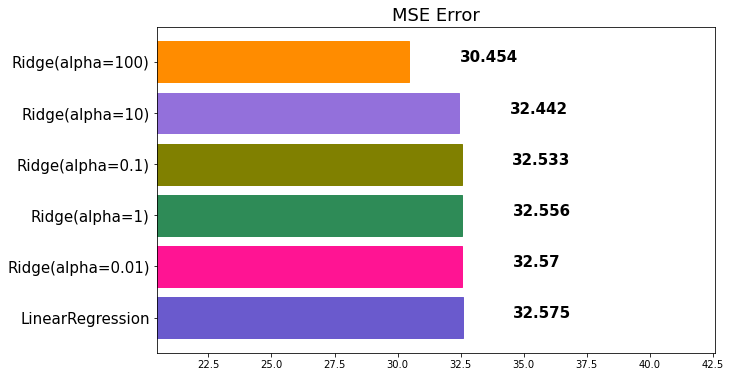

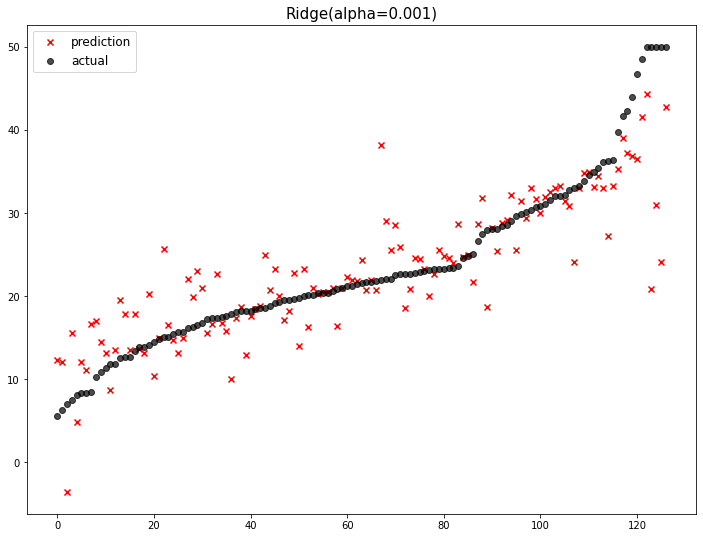

                model        mse
0    LinearRegression  32.575487
1  Ridge(alpha=0.001)  32.574932
2   Ridge(alpha=0.01)  32.570078
3      Ridge(alpha=1)  32.556222
4    Ridge(alpha=0.1)  32.533482
5     Ridge(alpha=10)  32.441541
6    Ridge(alpha=100)  30.454130


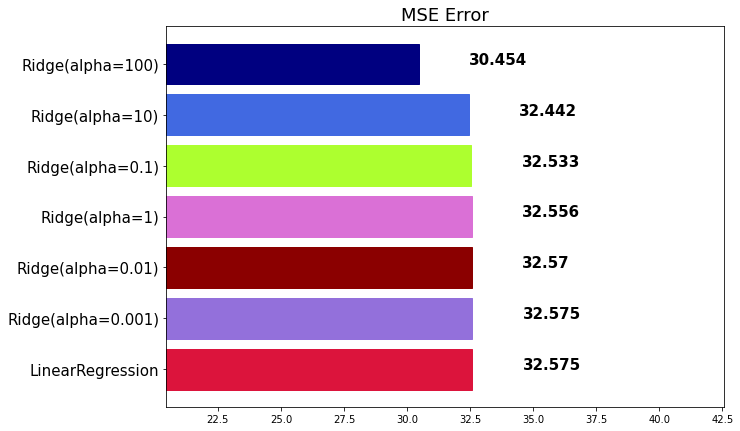

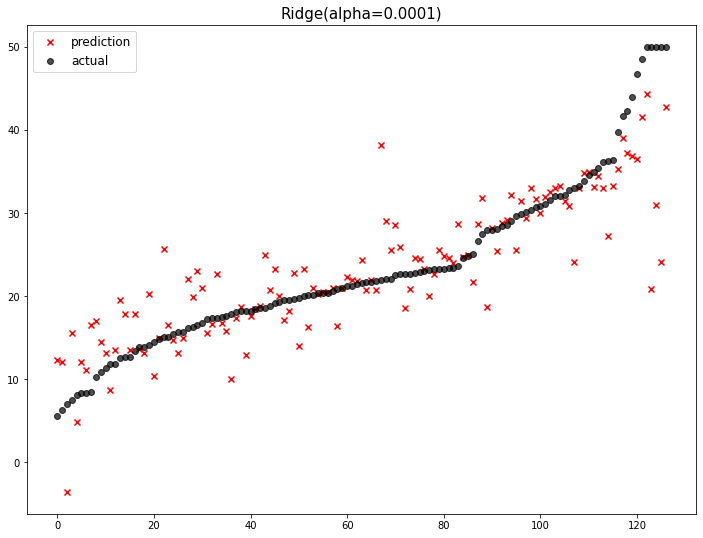

                 model        mse
0     LinearRegression  32.575487
1  Ridge(alpha=0.0001)  32.575431
2   Ridge(alpha=0.001)  32.574932
3    Ridge(alpha=0.01)  32.570078
4       Ridge(alpha=1)  32.556222
5     Ridge(alpha=0.1)  32.533482
6      Ridge(alpha=10)  32.441541
7     Ridge(alpha=100)  30.454130


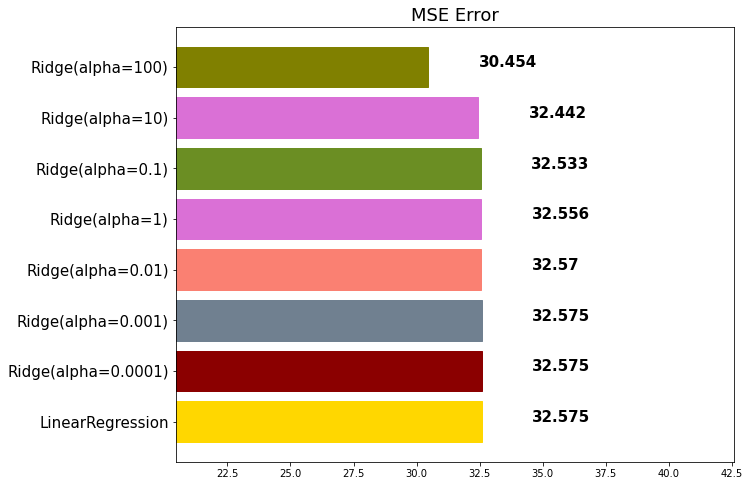

In [35]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [33]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [36]:
ridge.coef_

array([ -0.11312805,   0.02540969,   0.02018407,   2.15617017,
       -19.11200888,   4.80890778,  -0.00986857,  -1.35697711,
         0.26917082,  -0.00990543,  -1.02415706,   0.0069785 ,
        -0.41436403])

In [37]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

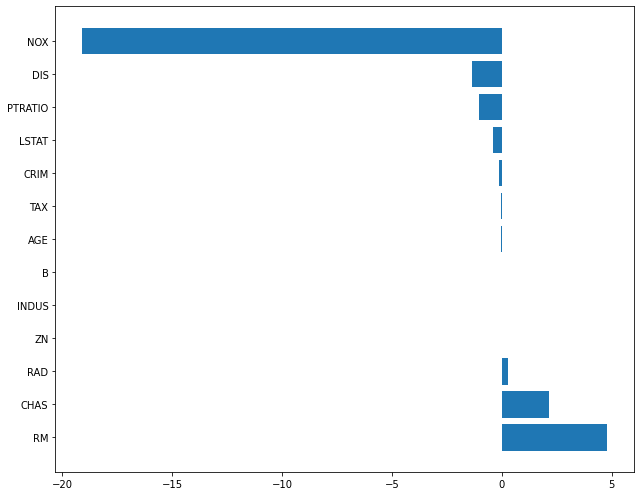

In [38]:
plot_coef(x_train.columns, ridge.coef_)

alpha 값에 따른 coef 의 차이를 확인해 봅시다

In [39]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

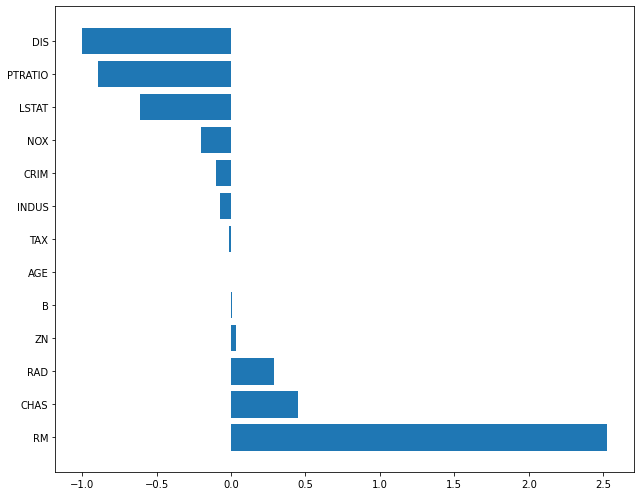

In [40]:
plot_coef(x_train.columns, ridge_100.coef_)

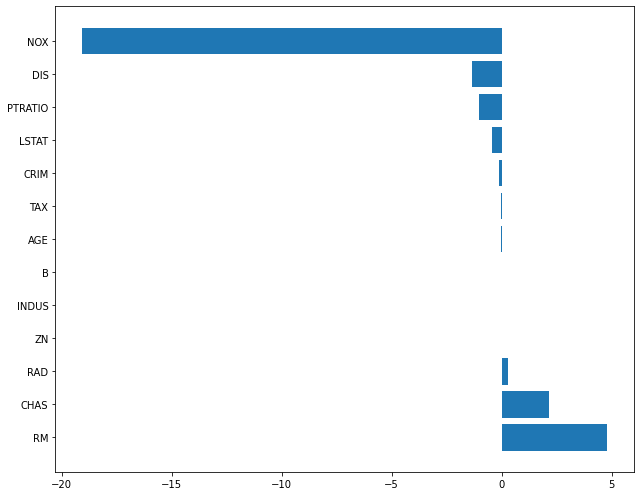

In [41]:
plot_coef(x_train.columns, ridge_001.coef_)

In [42]:
from sklearn.linear_model import Lasso

In [43]:
# 값이 커질 수록 큰 규제입니다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

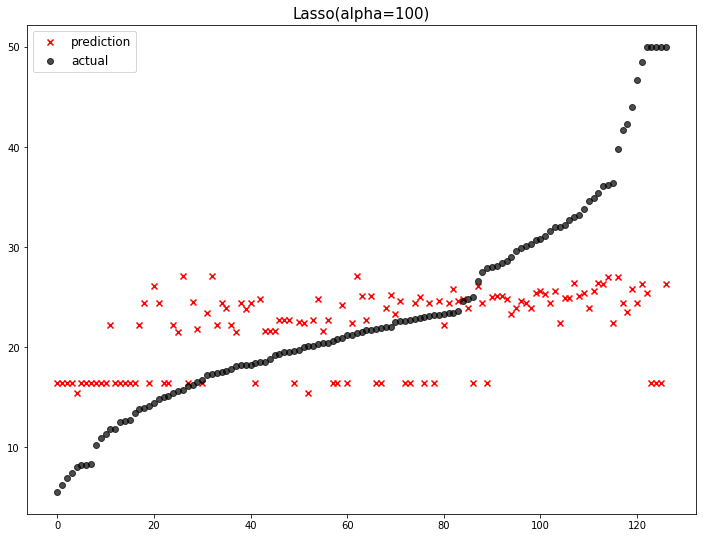

                 model        mse
0     Lasso(alpha=100)  86.189047
1     LinearRegression  32.575487
2  Ridge(alpha=0.0001)  32.575431
3   Ridge(alpha=0.001)  32.574932
4    Ridge(alpha=0.01)  32.570078
5       Ridge(alpha=1)  32.556222
6     Ridge(alpha=0.1)  32.533482
7      Ridge(alpha=10)  32.441541
8     Ridge(alpha=100)  30.454130


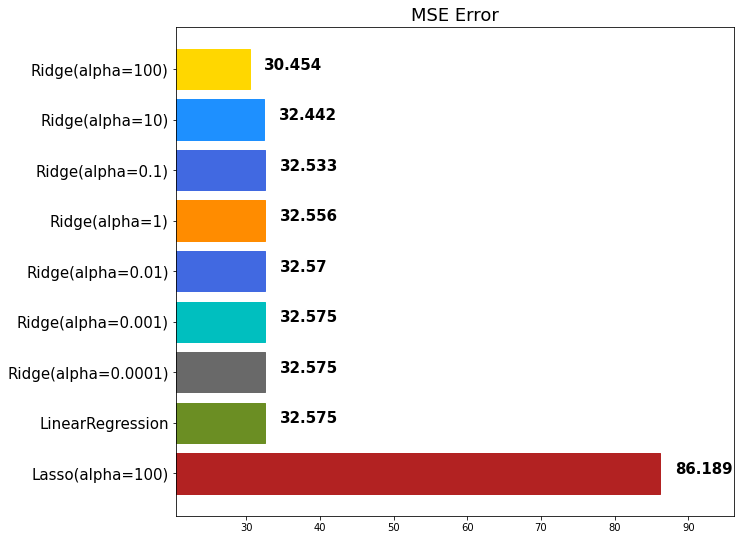

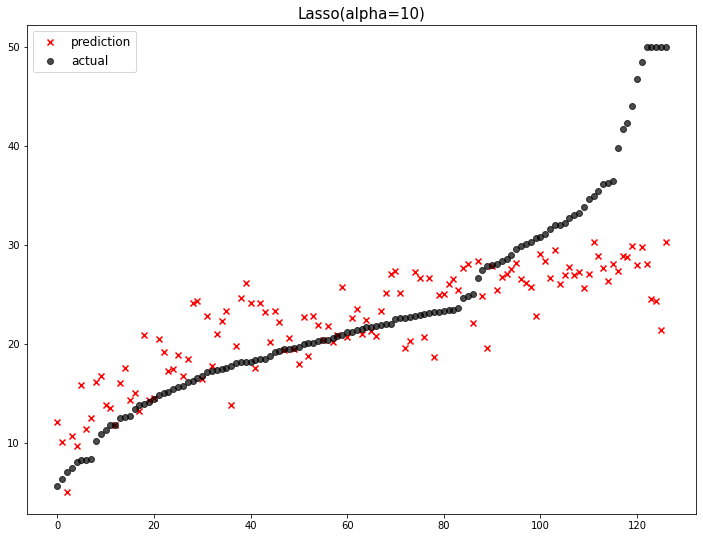

                 model        mse
0     Lasso(alpha=100)  86.189047
1      Lasso(alpha=10)  50.175254
2     LinearRegression  32.575487
3  Ridge(alpha=0.0001)  32.575431
4   Ridge(alpha=0.001)  32.574932
5    Ridge(alpha=0.01)  32.570078
6       Ridge(alpha=1)  32.556222
7     Ridge(alpha=0.1)  32.533482
8      Ridge(alpha=10)  32.441541
9     Ridge(alpha=100)  30.454130


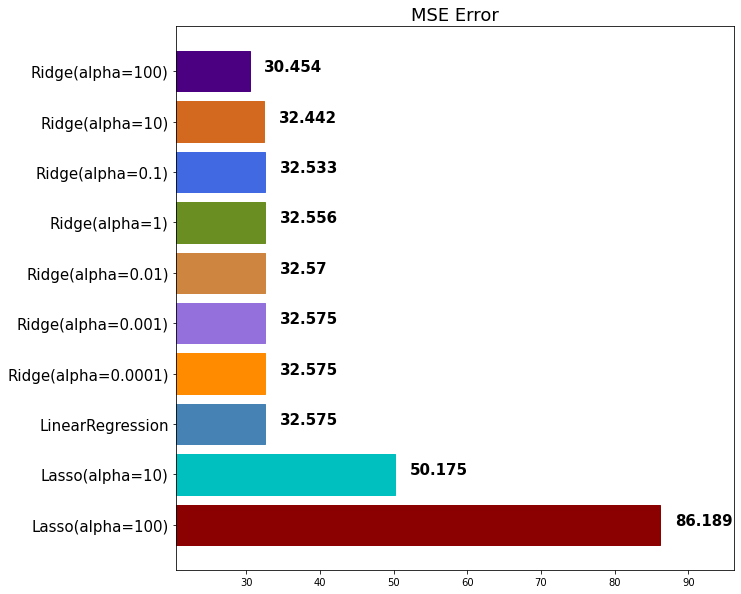

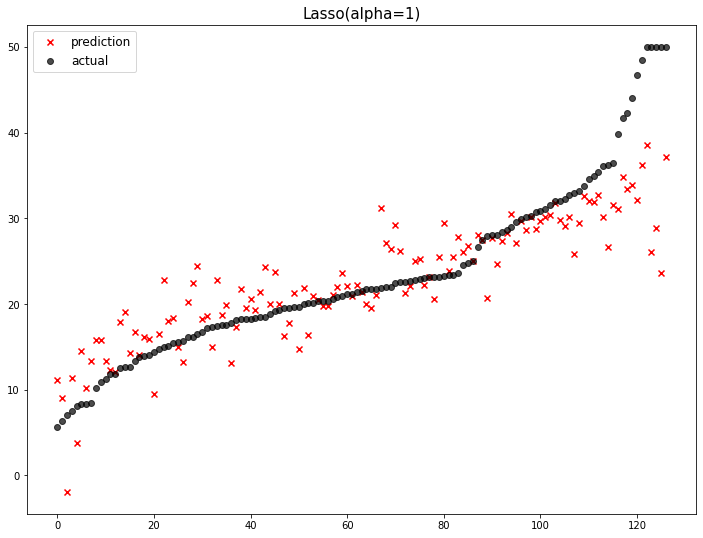

                  model        mse
0      Lasso(alpha=100)  86.189047
1       Lasso(alpha=10)  50.175254
2        Lasso(alpha=1)  32.633925
3      LinearRegression  32.575487
4   Ridge(alpha=0.0001)  32.575431
5    Ridge(alpha=0.001)  32.574932
6     Ridge(alpha=0.01)  32.570078
7        Ridge(alpha=1)  32.556222
8      Ridge(alpha=0.1)  32.533482
9       Ridge(alpha=10)  32.441541
10     Ridge(alpha=100)  30.454130


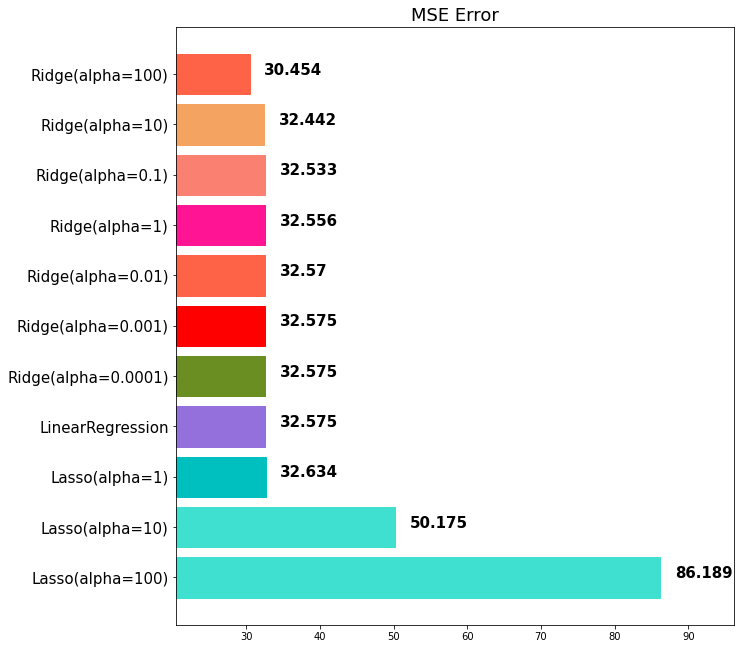

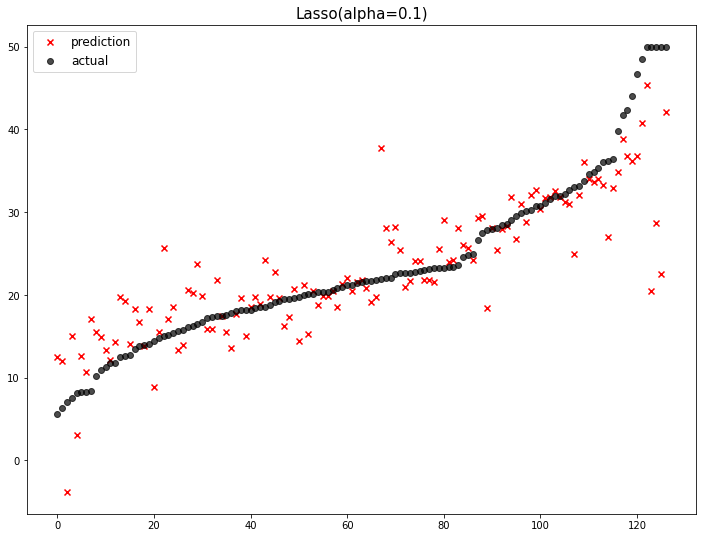

                  model        mse
0      Lasso(alpha=100)  86.189047
1       Lasso(alpha=10)  50.175254
2      Lasso(alpha=0.1)  33.370096
3        Lasso(alpha=1)  32.633925
4      LinearRegression  32.575487
5   Ridge(alpha=0.0001)  32.575431
6    Ridge(alpha=0.001)  32.574932
7     Ridge(alpha=0.01)  32.570078
8        Ridge(alpha=1)  32.556222
9      Ridge(alpha=0.1)  32.533482
10      Ridge(alpha=10)  32.441541
11     Ridge(alpha=100)  30.454130


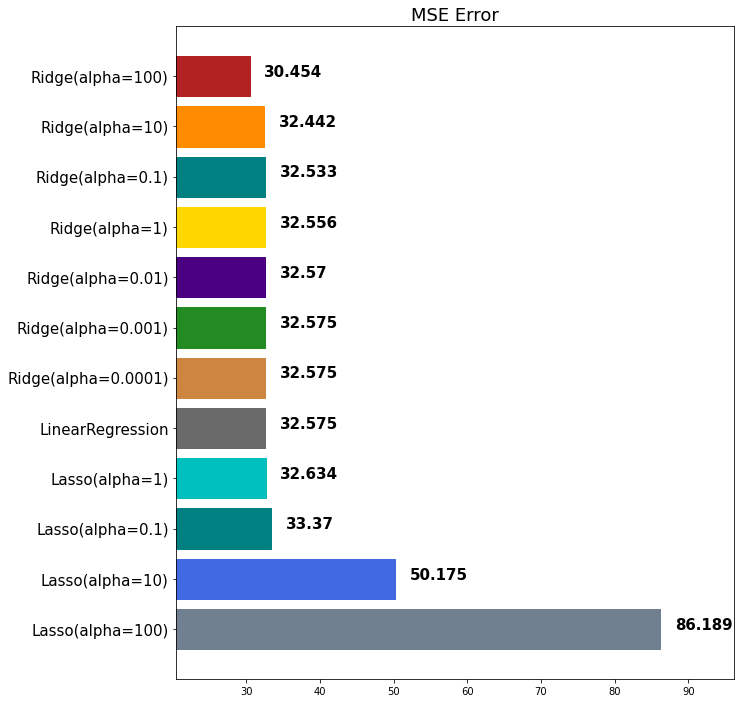

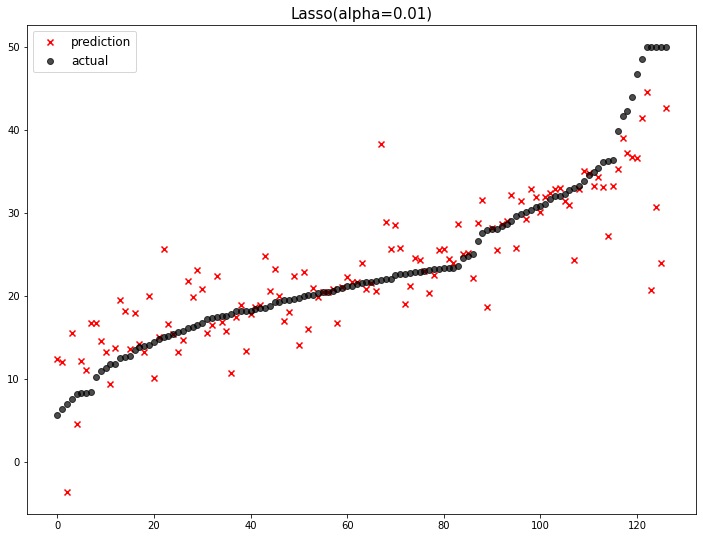

                  model        mse
0      Lasso(alpha=100)  86.189047
1       Lasso(alpha=10)  50.175254
2      Lasso(alpha=0.1)  33.370096
3        Lasso(alpha=1)  32.633925
4      LinearRegression  32.575487
5   Ridge(alpha=0.0001)  32.575431
6    Ridge(alpha=0.001)  32.574932
7     Ridge(alpha=0.01)  32.570078
8        Ridge(alpha=1)  32.556222
9      Ridge(alpha=0.1)  32.533482
10    Lasso(alpha=0.01)  32.508011
11      Ridge(alpha=10)  32.441541
12     Ridge(alpha=100)  30.454130


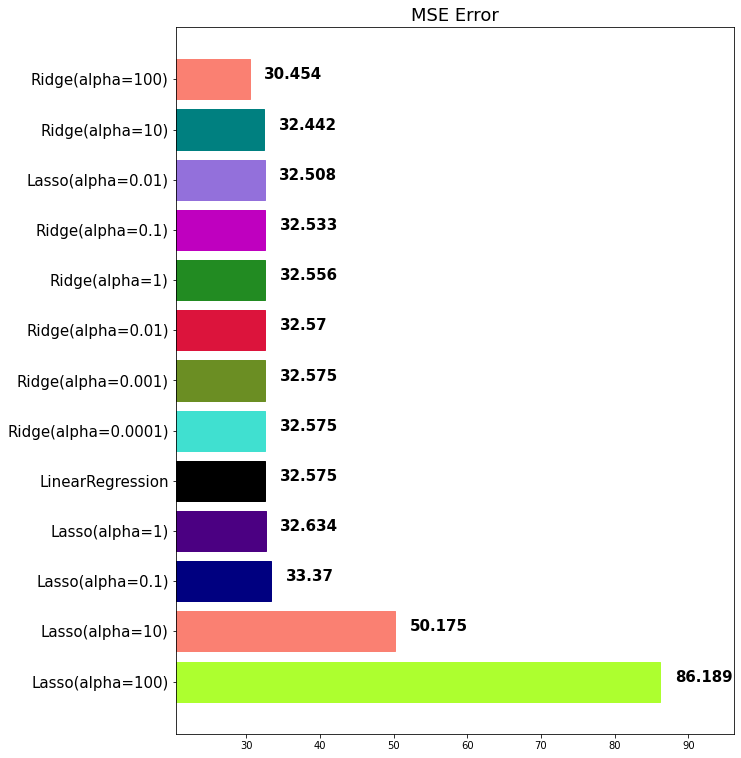

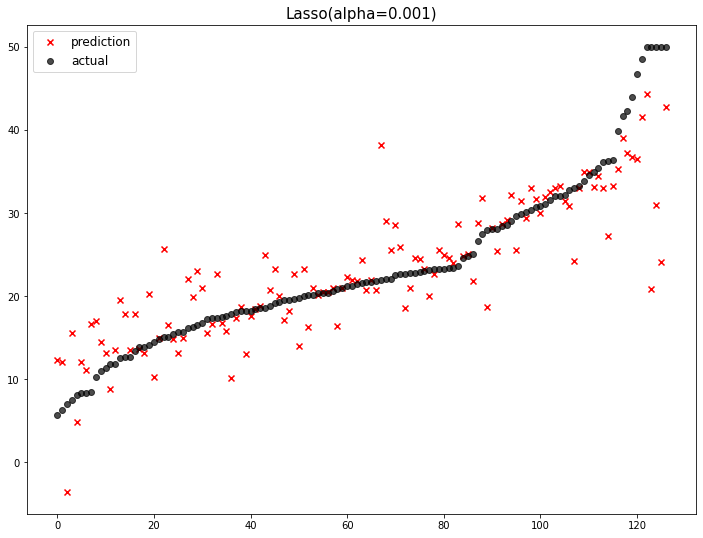

                  model        mse
0      Lasso(alpha=100)  86.189047
1       Lasso(alpha=10)  50.175254
2      Lasso(alpha=0.1)  33.370096
3        Lasso(alpha=1)  32.633925
4      LinearRegression  32.575487
5   Ridge(alpha=0.0001)  32.575431
6    Ridge(alpha=0.001)  32.574932
7     Ridge(alpha=0.01)  32.570078
8    Lasso(alpha=0.001)  32.564269
9        Ridge(alpha=1)  32.556222
10     Ridge(alpha=0.1)  32.533482
11    Lasso(alpha=0.01)  32.508011
12      Ridge(alpha=10)  32.441541
13     Ridge(alpha=100)  30.454130


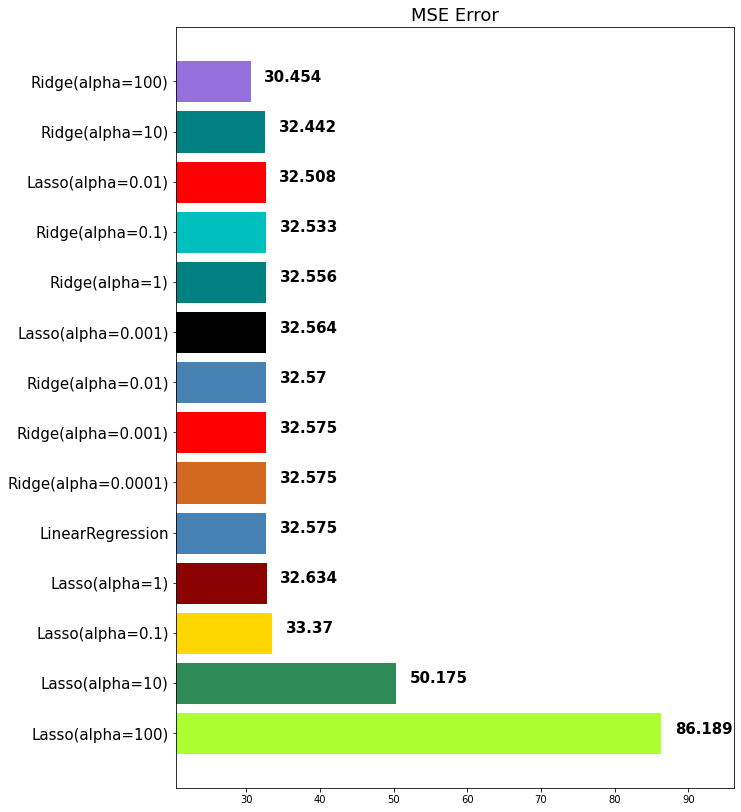

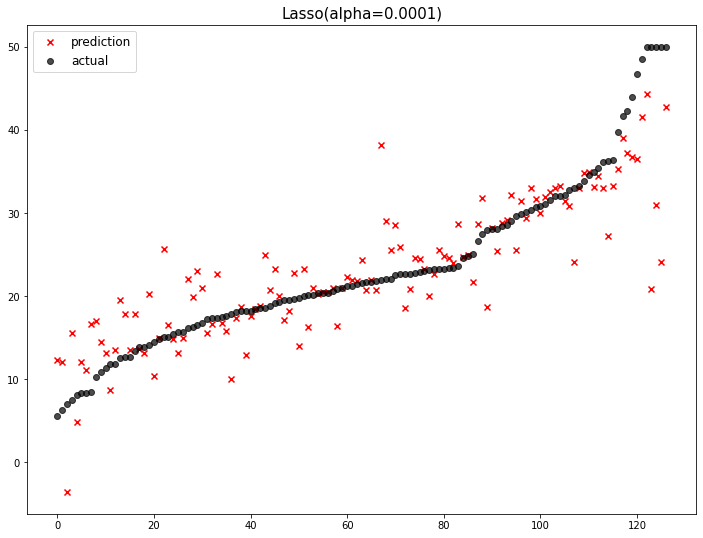

                  model        mse
0      Lasso(alpha=100)  86.189047
1       Lasso(alpha=10)  50.175254
2      Lasso(alpha=0.1)  33.370096
3        Lasso(alpha=1)  32.633925
4      LinearRegression  32.575487
5   Ridge(alpha=0.0001)  32.575431
6    Ridge(alpha=0.001)  32.574932
7   Lasso(alpha=0.0001)  32.574320
8     Ridge(alpha=0.01)  32.570078
9    Lasso(alpha=0.001)  32.564269
10       Ridge(alpha=1)  32.556222
11     Ridge(alpha=0.1)  32.533482
12    Lasso(alpha=0.01)  32.508011
13      Ridge(alpha=10)  32.441541
14     Ridge(alpha=100)  30.454130


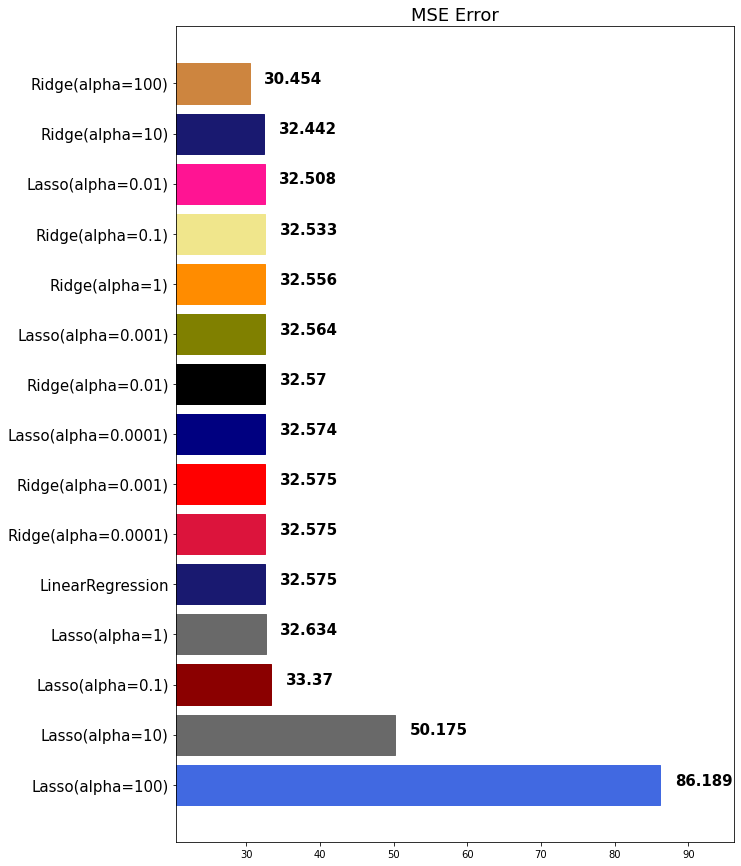

In [44]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [46]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

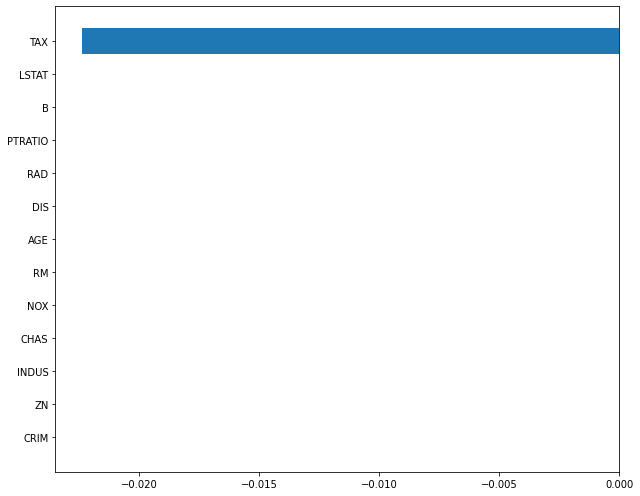

In [47]:
plot_coef(x_train.columns, lasso_100.coef_)

In [48]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02235423,
       -0.        ,  0.        , -0.        ])

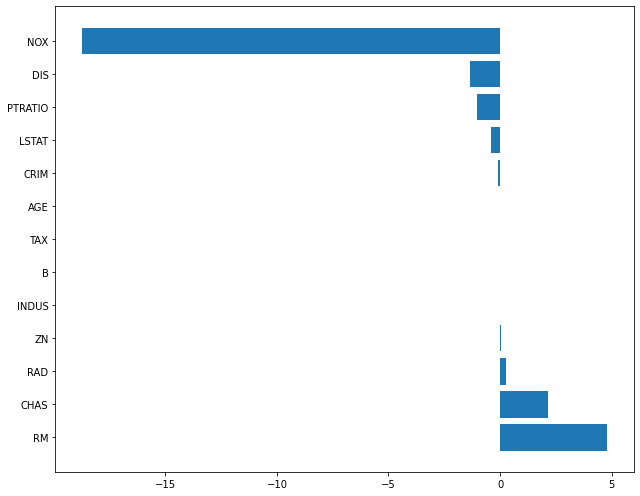

In [49]:
plot_coef(x_train.columns, lasso_001.coef_)

In [50]:
lasso_001.coef_

array([ -0.11292148,   0.02545059,   0.01872197,   2.13752781,
       -18.75237772,   4.80998386,  -0.0101463 ,  -1.35142442,
         0.26839265,  -0.00993863,  -1.02067293,   0.00699884,
        -0.41486084])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 규제만 사용). 
 * l1_ratio = 1 (L1 규제만 사용). 
 * 0 < l1_ratio < 1 (L1 and L2 규제의 혼합사용)

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
ratios = [0.2, 0.5, 0.8]

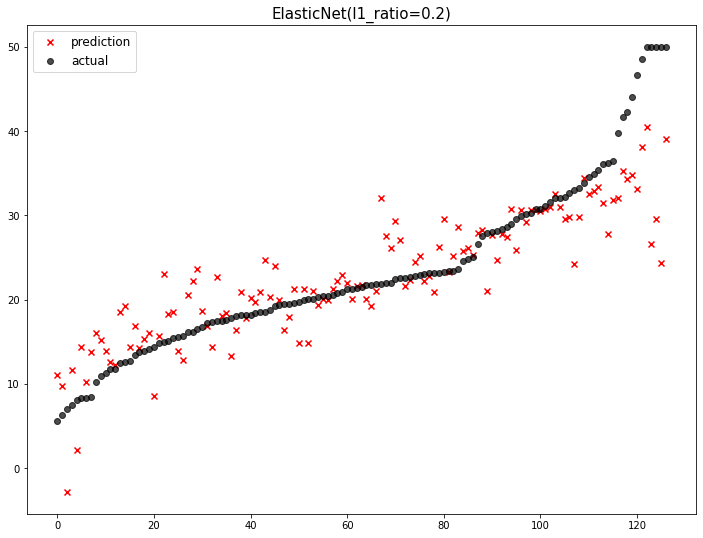

                       model        mse
0           Lasso(alpha=100)  86.189047
1            Lasso(alpha=10)  50.175254
2           Lasso(alpha=0.1)  33.370096
3             Lasso(alpha=1)  32.633925
4           LinearRegression  32.575487
5        Ridge(alpha=0.0001)  32.575431
6         Ridge(alpha=0.001)  32.574932
7        Lasso(alpha=0.0001)  32.574320
8          Ridge(alpha=0.01)  32.570078
9         Lasso(alpha=0.001)  32.564269
10            Ridge(alpha=1)  32.556222
11          Ridge(alpha=0.1)  32.533482
12         Lasso(alpha=0.01)  32.508011
13           Ridge(alpha=10)  32.441541
14  ElasticNet(l1_ratio=0.2)  30.614715
15          Ridge(alpha=100)  30.454130


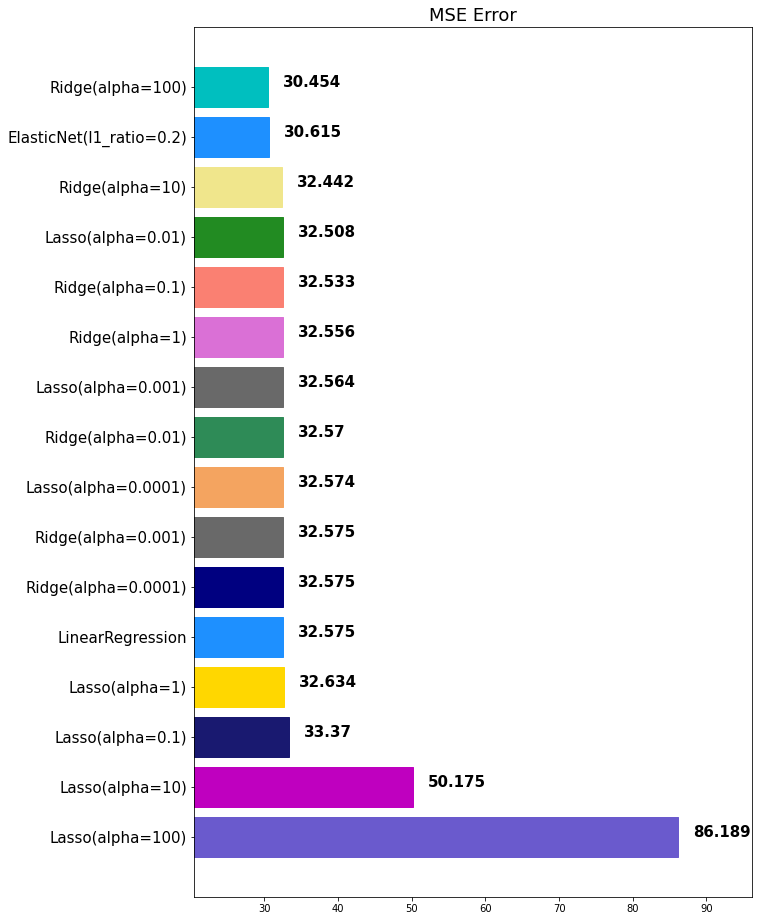

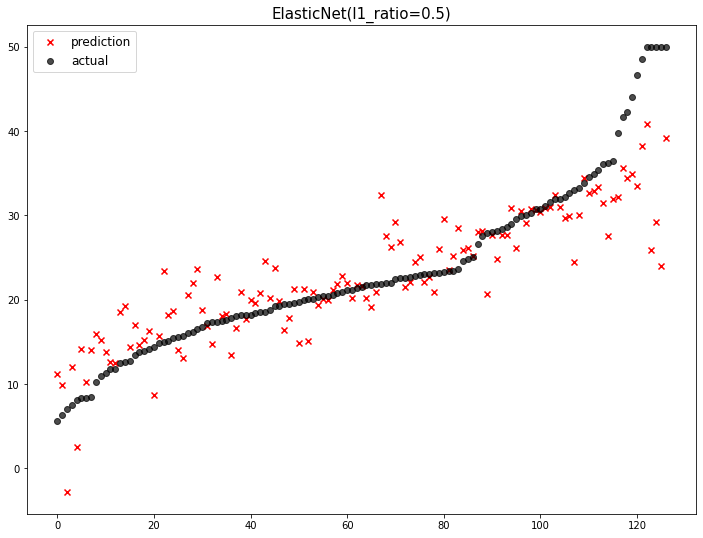

                       model        mse
0           Lasso(alpha=100)  86.189047
1            Lasso(alpha=10)  50.175254
2           Lasso(alpha=0.1)  33.370096
3             Lasso(alpha=1)  32.633925
4           LinearRegression  32.575487
5        Ridge(alpha=0.0001)  32.575431
6         Ridge(alpha=0.001)  32.574932
7        Lasso(alpha=0.0001)  32.574320
8          Ridge(alpha=0.01)  32.570078
9         Lasso(alpha=0.001)  32.564269
10            Ridge(alpha=1)  32.556222
11          Ridge(alpha=0.1)  32.533482
12         Lasso(alpha=0.01)  32.508011
13           Ridge(alpha=10)  32.441541
14  ElasticNet(l1_ratio=0.5)  30.865028
15  ElasticNet(l1_ratio=0.2)  30.614715
16          Ridge(alpha=100)  30.454130


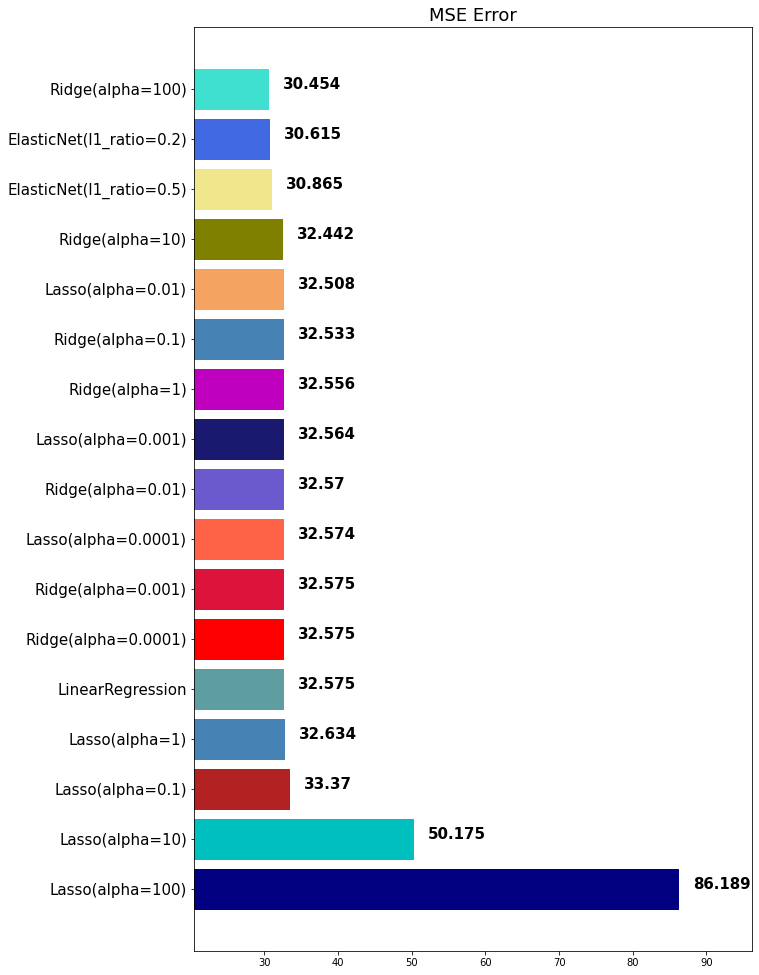

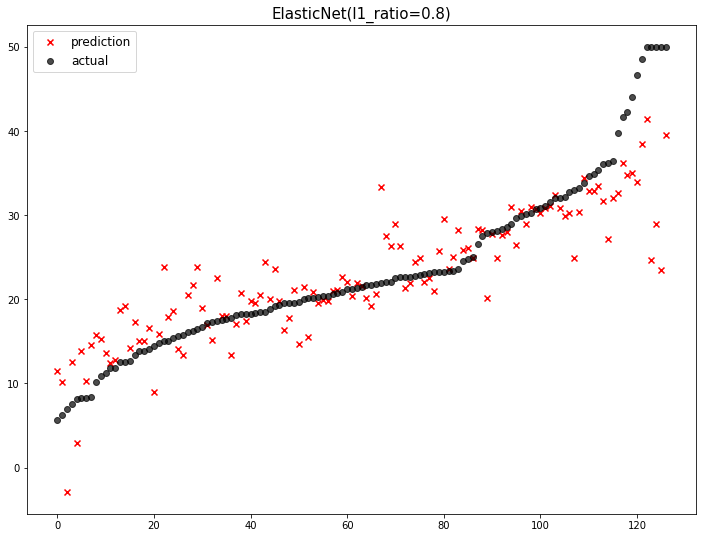

                       model        mse
0           Lasso(alpha=100)  86.189047
1            Lasso(alpha=10)  50.175254
2           Lasso(alpha=0.1)  33.370096
3             Lasso(alpha=1)  32.633925
4           LinearRegression  32.575487
5        Ridge(alpha=0.0001)  32.575431
6         Ridge(alpha=0.001)  32.574932
7        Lasso(alpha=0.0001)  32.574320
8          Ridge(alpha=0.01)  32.570078
9         Lasso(alpha=0.001)  32.564269
10            Ridge(alpha=1)  32.556222
11          Ridge(alpha=0.1)  32.533482
12         Lasso(alpha=0.01)  32.508011
13           Ridge(alpha=10)  32.441541
14  ElasticNet(l1_ratio=0.8)  31.298676
15  ElasticNet(l1_ratio=0.5)  30.865028
16  ElasticNet(l1_ratio=0.2)  30.614715
17          Ridge(alpha=100)  30.454130


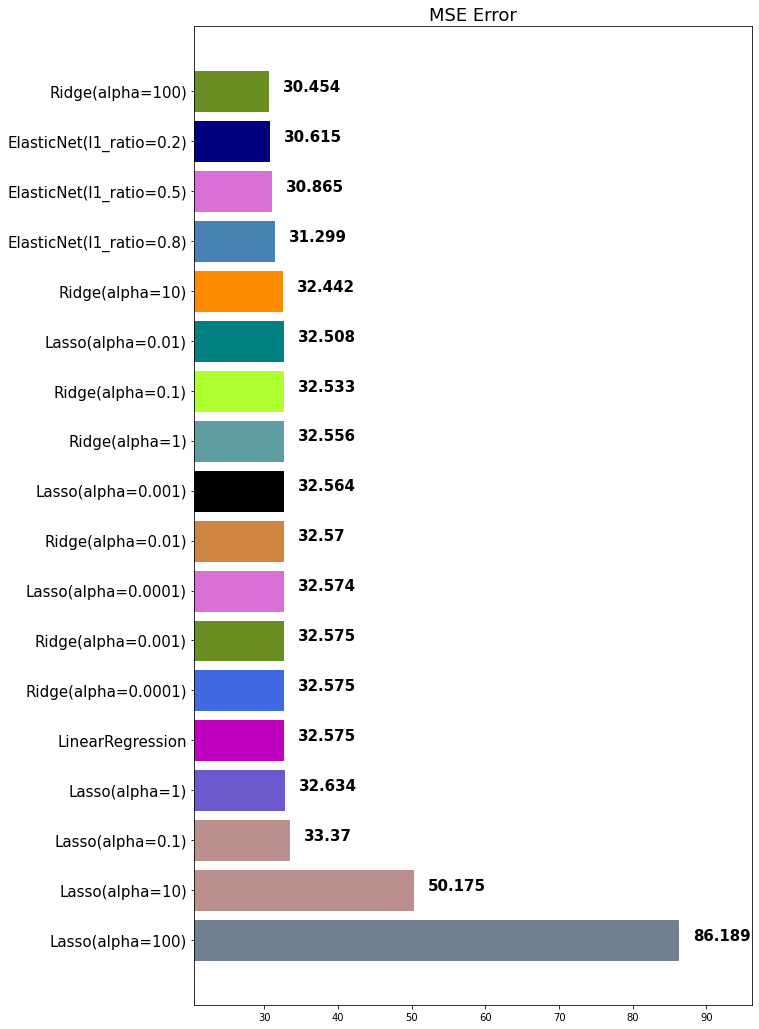

In [53]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [54]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

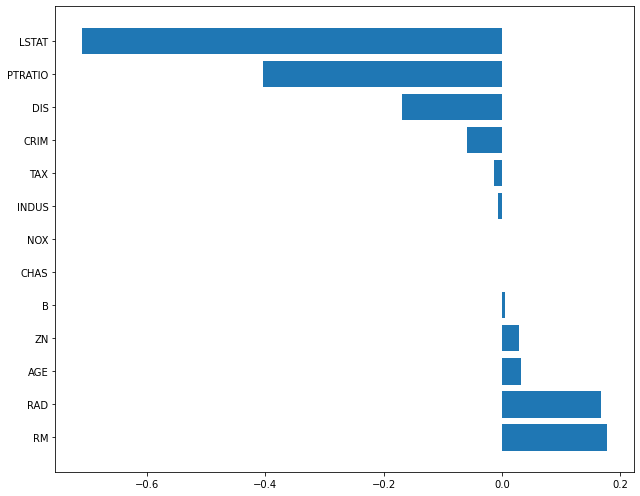

In [55]:
plot_coef(x_train.columns, elsticnet_20.coef_)

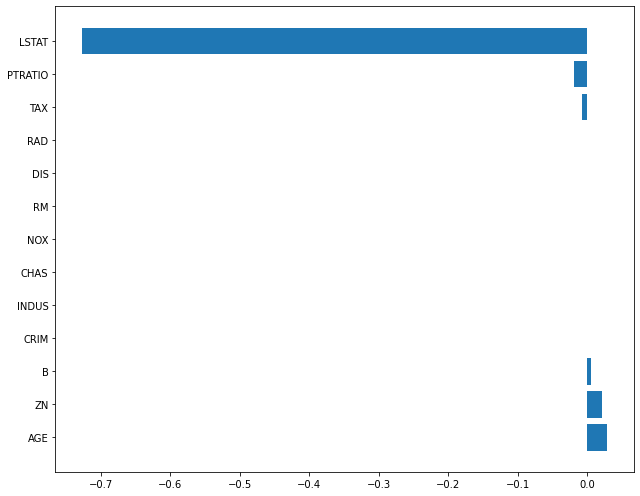

In [56]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [57]:
elsticnet_80.coef_

array([-0.        ,  0.02068682, -0.        ,  0.        , -0.        ,
        0.        ,  0.02886248, -0.        ,  0.        , -0.00790586,
       -0.01957194,  0.00466564, -0.72756514])

## Scaler

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [60]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.762389,10.978892,11.099103,0.073879,0.554339,6.259908,68.904485,3.822997,9.427441,404.131926,18.476517,358.593272,12.737942
std,9.137330,22.353008,6.778286,0.261919,0.113704,0.693341,27.797008,2.110341,8.612277,167.330562,2.119150,87.934571,7.072002
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.081930,0.000000,5.190000,0.000000,0.453000,5.887500,45.250000,2.093450,4.000000,277.000000,17.400000,376.355000,7.160000
50%,0.263630,0.000000,9.690000,0.000000,0.538000,6.193000,76.900000,3.317500,5.000000,330.000000,19.000000,391.980000,11.410000
75%,3.614060,12.500000,18.100000,0.000000,0.624000,6.566000,94.350000,5.164300,24.000000,666.000000,20.200000,396.900000,17.110000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [61]:
std_scaler = StandardScaler()

In [62]:
std_scaled = std_scaler.fit_transform(x_train)

In [63]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.49,-1.57,-0.28,-1.49,-3.90,-2.27,-1.27,-0.98,-1.30,-2.78,-4.05,-1.56
25%,-0.40,-0.49,-0.87,-0.28,-0.89,-0.54,-0.85,-0.82,-0.63,-0.76,-0.51,0.20,-0.79
50%,-0.38,-0.49,-0.21,-0.28,-0.14,-0.10,0.29,-0.24,-0.51,-0.44,0.25,0.38,-0.19
75%,-0.02,0.07,1.03,-0.28,0.61,0.44,0.92,0.64,1.69,1.57,0.81,0.44,0.62
max,9.34,3.99,2.46,3.54,2.79,3.56,1.12,3.94,1.69,1.84,1.66,0.44,3.57


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [64]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [65]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.39,0.07,0.35,0.52,0.67,0.24,0.37,0.41,0.63,0.90,0.30
std,0.10,0.22,0.25,0.26,0.23,0.13,0.30,0.19,0.37,0.32,0.23,0.22,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.14,0.45,0.42,0.09,0.13,0.17,0.51,0.95,0.15
50%,0.00,0.00,0.34,0.00,0.31,0.51,0.75,0.20,0.17,0.27,0.68,0.99,0.27
75%,0.04,0.12,0.65,0.00,0.49,0.58,0.94,0.37,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.

**outlier 값 처리에 유용**

In [66]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [67]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [68]:
from sklearn.pipeline import make_pipeline

In [69]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [70]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

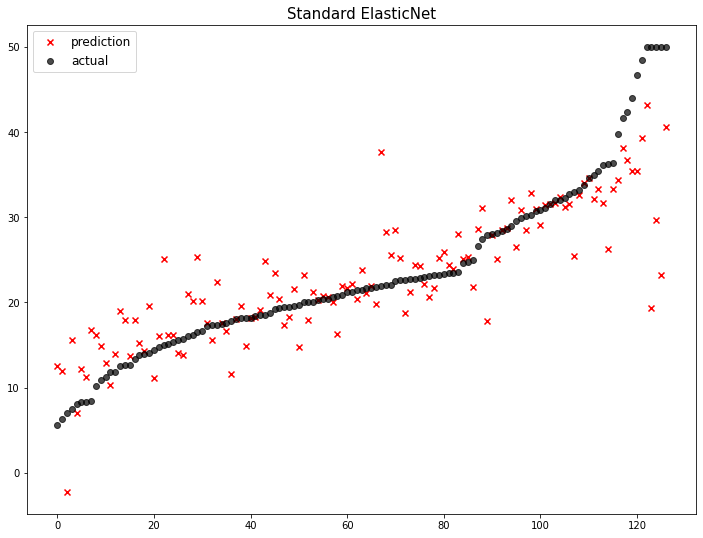

                       model        mse
0           Lasso(alpha=100)  86.189047
1            Lasso(alpha=10)  50.175254
2        Standard ElasticNet  34.088761
3           Lasso(alpha=0.1)  33.370096
4             Lasso(alpha=1)  32.633925
5           LinearRegression  32.575487
6        Ridge(alpha=0.0001)  32.575431
7         Ridge(alpha=0.001)  32.574932
8        Lasso(alpha=0.0001)  32.574320
9          Ridge(alpha=0.01)  32.570078
10        Lasso(alpha=0.001)  32.564269
11            Ridge(alpha=1)  32.556222
12          Ridge(alpha=0.1)  32.533482
13         Lasso(alpha=0.01)  32.508011
14           Ridge(alpha=10)  32.441541
15  ElasticNet(l1_ratio=0.8)  31.298676
16  ElasticNet(l1_ratio=0.5)  30.865028
17  ElasticNet(l1_ratio=0.2)  30.614715
18          Ridge(alpha=100)  30.454130


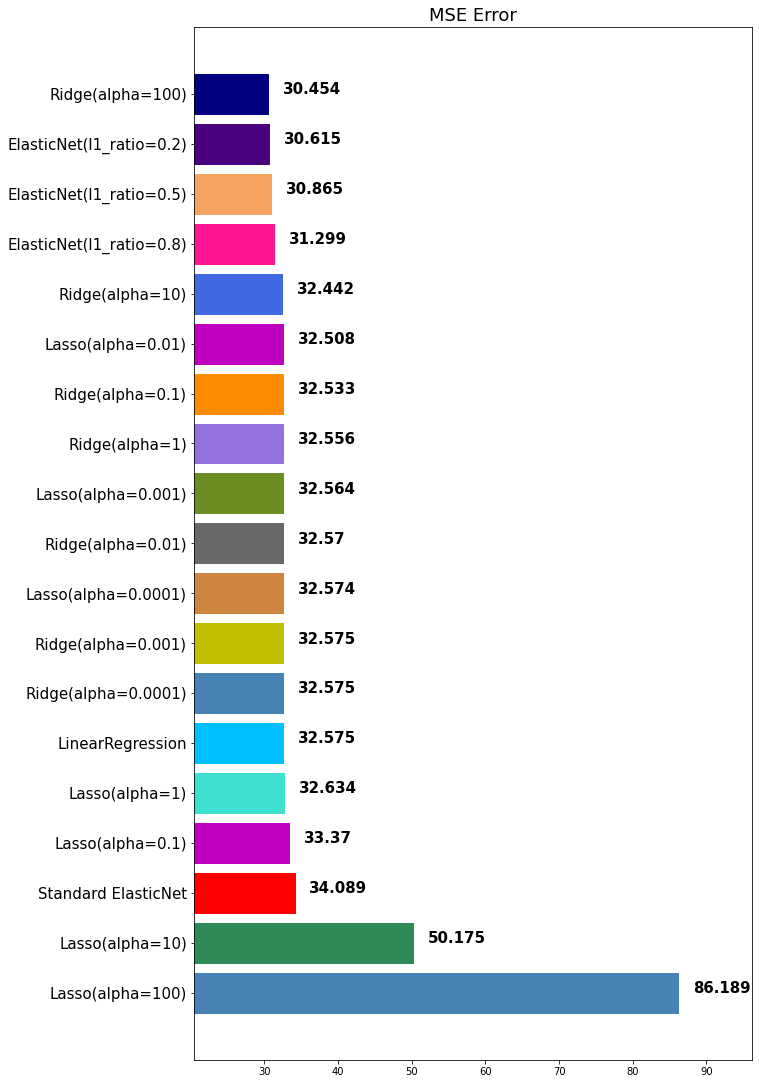

In [71]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

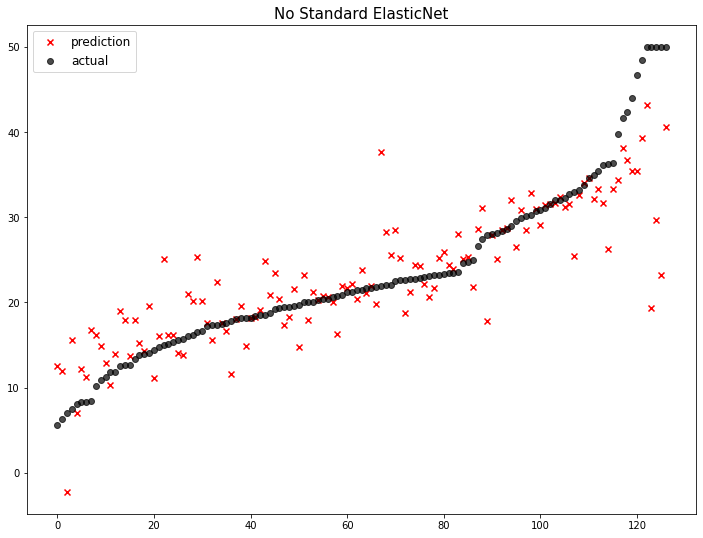

                       model        mse
0           Lasso(alpha=100)  86.189047
1            Lasso(alpha=10)  50.175254
2        Standard ElasticNet  34.088761
3     No Standard ElasticNet  34.088761
4           Lasso(alpha=0.1)  33.370096
5             Lasso(alpha=1)  32.633925
6           LinearRegression  32.575487
7        Ridge(alpha=0.0001)  32.575431
8         Ridge(alpha=0.001)  32.574932
9        Lasso(alpha=0.0001)  32.574320
10         Ridge(alpha=0.01)  32.570078
11        Lasso(alpha=0.001)  32.564269
12            Ridge(alpha=1)  32.556222
13          Ridge(alpha=0.1)  32.533482
14         Lasso(alpha=0.01)  32.508011
15           Ridge(alpha=10)  32.441541
16  ElasticNet(l1_ratio=0.8)  31.298676
17  ElasticNet(l1_ratio=0.5)  30.865028
18  ElasticNet(l1_ratio=0.2)  30.614715
19          Ridge(alpha=100)  30.454130


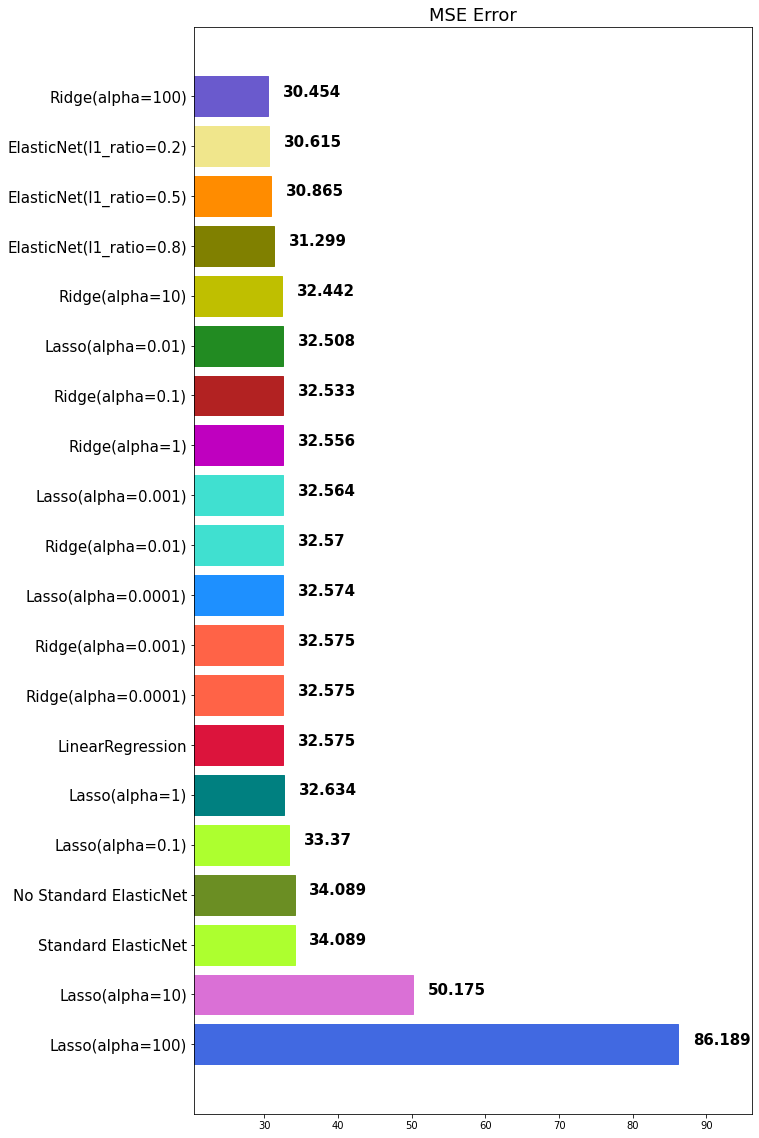

In [72]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)

다항식의 계수간 상호작용을 통해 **새로운 feature를 생성**합니다.

예를들면, [a, b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features 는 [1, a, b, a^2, ab, b^2] 가 됩니다.

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [75]:
poly_features = poly.fit_transform(x_train)[0]

In [76]:
poly_features

array([     1.6566    ,      0.        ,     19.58      ,      0.        ,
            0.871     ,      6.122     ,     97.3       ,      1.618     ,
            5.        ,    403.        ,     14.7       ,    372.8       ,
           14.1       ,      2.74432356,      0.        ,     32.436228  ,
            0.        ,      1.4428986 ,     10.1417052 ,    161.18718   ,
            2.6803788 ,      8.283     ,    667.6098    ,     24.35202   ,
          617.58048   ,     23.35806   ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    383.3764    ,      0.        ,
           17.05418   ,    119.86876   ,   1905.134     ,     31.68044   ,
           97.9       ,   7890.74      ,    287.826     ,   7299.424     ,
          276.078     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [77]:
x_train.iloc[0]

CRIM         1.6566
ZN           0.0000
INDUS       19.5800
CHAS         0.0000
NOX          0.8710
RM           6.1220
AGE         97.3000
DIS          1.6180
RAD          5.0000
TAX        403.0000
PTRATIO     14.7000
B          372.8000
LSTAT       14.1000
Name: 150, dtype: float64

In [78]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [79]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.087e+01, tolerance: 2.960e+00
  model = cd_fast.enet_coordinate_descent(


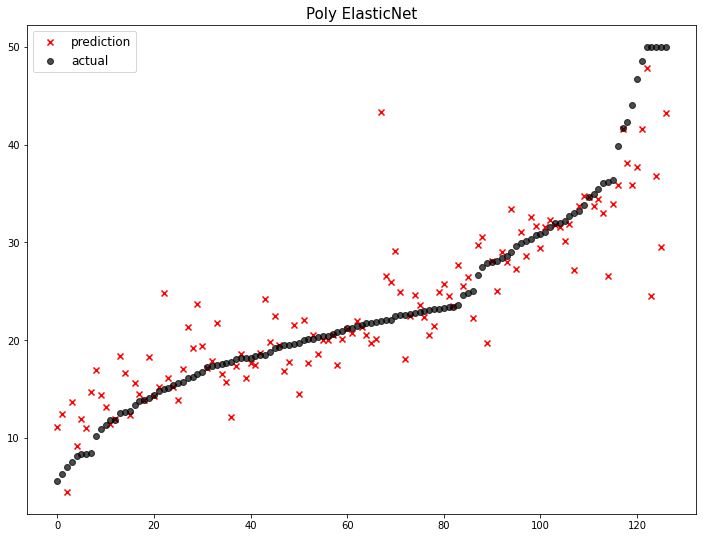

                       model        mse
0           Lasso(alpha=100)  86.189047
1            Lasso(alpha=10)  50.175254
2        Standard ElasticNet  34.088761
3     No Standard ElasticNet  34.088761
4           Lasso(alpha=0.1)  33.370096
5             Lasso(alpha=1)  32.633925
6           LinearRegression  32.575487
7        Ridge(alpha=0.0001)  32.575431
8         Ridge(alpha=0.001)  32.574932
9        Lasso(alpha=0.0001)  32.574320
10         Ridge(alpha=0.01)  32.570078
11        Lasso(alpha=0.001)  32.564269
12            Ridge(alpha=1)  32.556222
13          Ridge(alpha=0.1)  32.533482
14         Lasso(alpha=0.01)  32.508011
15           Ridge(alpha=10)  32.441541
16  ElasticNet(l1_ratio=0.8)  31.298676
17  ElasticNet(l1_ratio=0.5)  30.865028
18  ElasticNet(l1_ratio=0.2)  30.614715
19          Ridge(alpha=100)  30.454130
20           Poly ElasticNet  24.558049


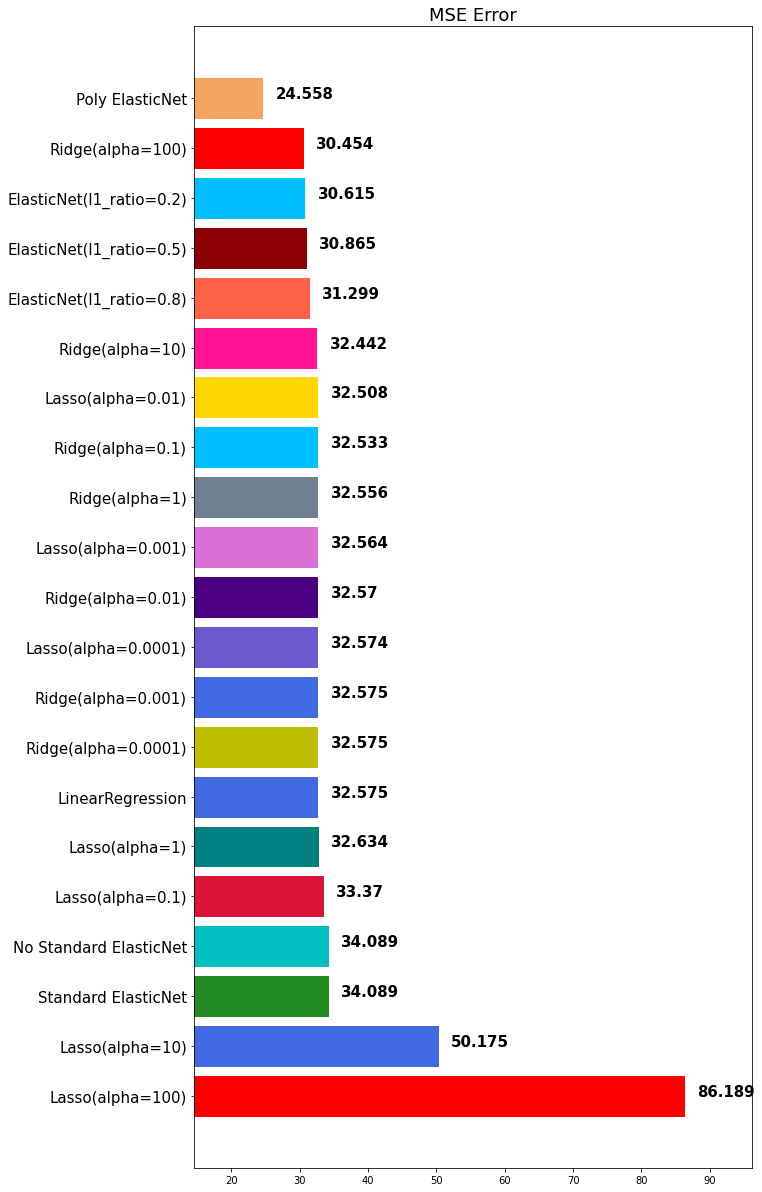

In [80]:
mse_eval('Poly ElasticNet', poly_pred, y_test)